Scrapping data from skytrax

In [2]:
!pip install wordcloud
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install stopwords
import stopwords

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages+1):
    print(f"Scrapping page{i}")

    #create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response =requests.get(url)

    #Parse content
    content = response.content
    parsed_content = BeautifulSoup(content,'html.parser')
    for para in parsed_content.find_all("div",{"class":"text_content"}):
        reviews.append(para.get_text())

    print(f" --->{len(reviews)} total reviews")

Scrapping page1
 --->100 total reviews
Scrapping page2
 --->200 total reviews
Scrapping page3
 --->300 total reviews
Scrapping page4
 --->400 total reviews
Scrapping page5
 --->500 total reviews
Scrapping page6
 --->600 total reviews
Scrapping page7
 --->700 total reviews
Scrapping page8
 --->800 total reviews
Scrapping page9
 --->900 total reviews
Scrapping page10
 --->1000 total reviews


In [4]:
df =pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | We are extremely grateful ...
1,✅ Trip Verified | I had an appalling experie...
2,"Not Verified | Good points, the cabin crew, t..."
3,"Not Verified | It was a decent flight, reason..."
4,✅ Trip Verified | I really like flying Briti...


In [5]:
df.to_csv("BA_reviews.csv", index=False)

In [6]:
reviews_df = pd.read_csv("BA_reviews.csv")
reviews_df

,reviews
0,✅ Trip Verified | We are extremely grateful ...
1,✅ Trip Verified | I had an appalling experie...
2,"Not Verified | Good points, the cabin crew, t..."
3,"Not Verified | It was a decent flight, reason..."
4,✅ Trip Verified | I really like flying Briti...
...,...
995,✅ Trip Verified | Having booked this flight a ...
996,✅ Trip Verified | I wouldn't even rate them 1...
997,✅ Trip Verified | Flying London City to Geneva...
998,✅ Trip Verified | Los Angeles to Istanbul via...


In [7]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [8]:
reviews_df.describe()

,reviews
count,1000
unique,1000
top,✅ Trip Verified | We are extremely grateful ...
freq,1


In [9]:
#change the data type of verified reviews to string
reviews_df['reviews'] = reviews_df['reviews'].astype(str)

In [10]:
#calculate the length of reviews column
reviews_df['length'] = reviews_df['reviews'].apply(len)

In [11]:
reviews_df.head()

,reviews,length
0,✅ Trip Verified | We are extremely grateful ...,213
1,✅ Trip Verified | I had an appalling experie...,1655
2,"Not Verified | Good points, the cabin crew, t...",1228
3,"Not Verified | It was a decent flight, reason...",612
4,✅ Trip Verified | I really like flying Briti...,739


<Axes: ylabel='Frequency'>

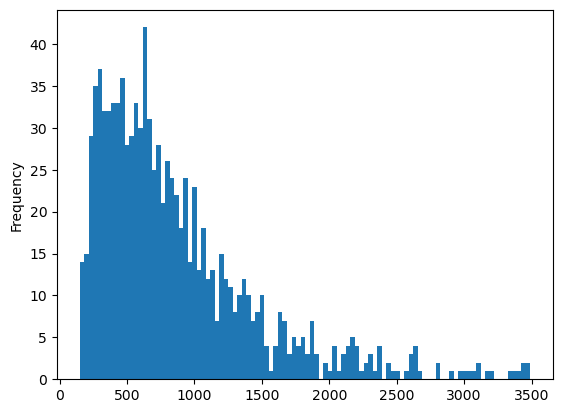

In [12]:
#plot histogram for length
reviews_df['length'].plot(bins=100,kind='hist')

In [13]:
reviews_df.describe()

,length
count,1000.000000
mean,867.658000
std,606.418319
min,148.000000
25%,436.750000
50%,699.500000
75%,1099.750000
max,3492.000000


In [85]:
reviews_df['reviews'] = reviews_df['reviews'].str.replace(r'✅ Trip Verified \|\s*', '', regex=True)
reviews_df['reviews'] = reviews_df['reviews'].str.replace(r'Not Verified \|\s*', '', regex=True)

reviews_df.head()

,reviews,length
0,We are extremely grateful to the crew of fl...,213
1,I had an appalling experience with British ...,1655
2,"Good points, the cabin crew, they were helpf...",1228
3,"It was a decent flight, reasonable comfortab...",612
4,I really like flying British Airways partic...,739


In [89]:
#join all sentences
sentences_as_one_string = " ".join(reviews_df['reviews'])

In [91]:
sentences_as_one_string

'\xa0 \xa0We are extremely grateful to the crew of flight BA0058 from Cape Town to Heathrow. They brought us home with such a high level of professionalism, flexibility, and empathy.  Thank you so much.     I had an appalling experience with British Airways. It started when I tried to check in online but couldn’t change my seat due to repeated website errors. I arrived at the airport 4 hours early to sort it out, but the staff at the check-in counter refused to help me—brushing me off before I could even say which flight I was on, simply saying all flights were full. Incredibly rude and unprofessional. The BA lounge was overcrowded, uncomfortable, and poorly equipped—wooden utensils only and very limited seating. Shortly before boarding, I was struck with excruciating abdominal pain. Fearing a medical emergency, I asked to be offloaded. Staff at the boarding gate took my boarding pass and luggage tag, asked me to wait, and then left me sitting there in agony for 40 minutes. I eventuall

In [18]:
from wordcloud import WordCloud

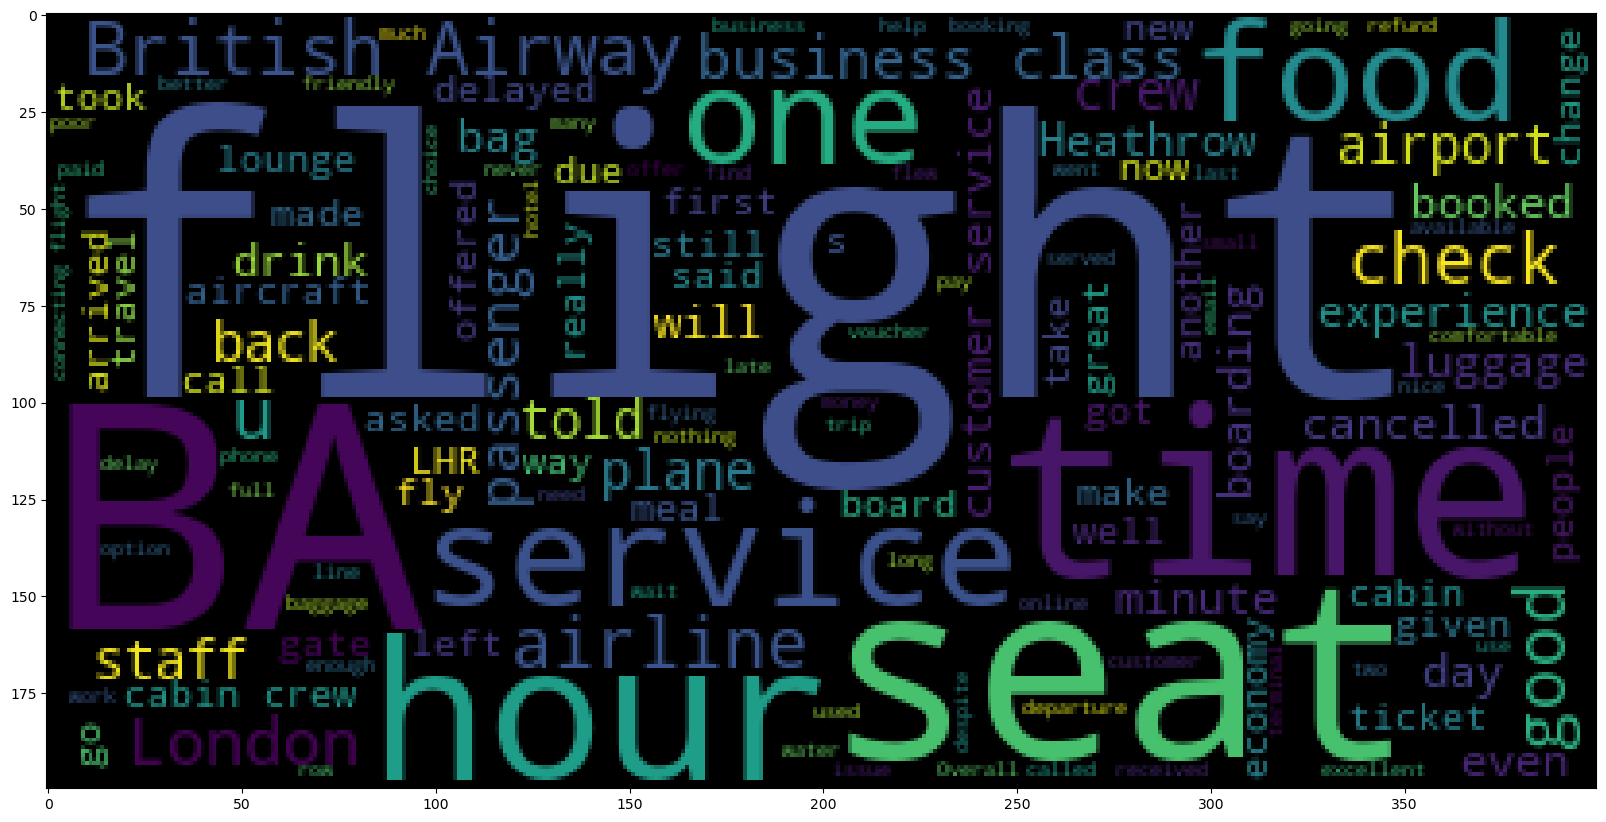

In [87]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [97]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

reviews_df['Sentiment'] = reviews_df['reviews'].apply(lambda x: 'positive' if sia.polarity_scores(x)['compound'] > 0 else 'negative')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sndpred/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [99]:
reviews_df.head()

,reviews,length,Sentiment
0,We are extremely grateful to the crew of fl...,213,positive
1,I had an appalling experience with British ...,1655,negative
2,"Good points, the cabin crew, they were helpf...",1228,positive
3,"It was a decent flight, reasonable comfortab...",612,positive
4,I really like flying British Airways partic...,739,positive


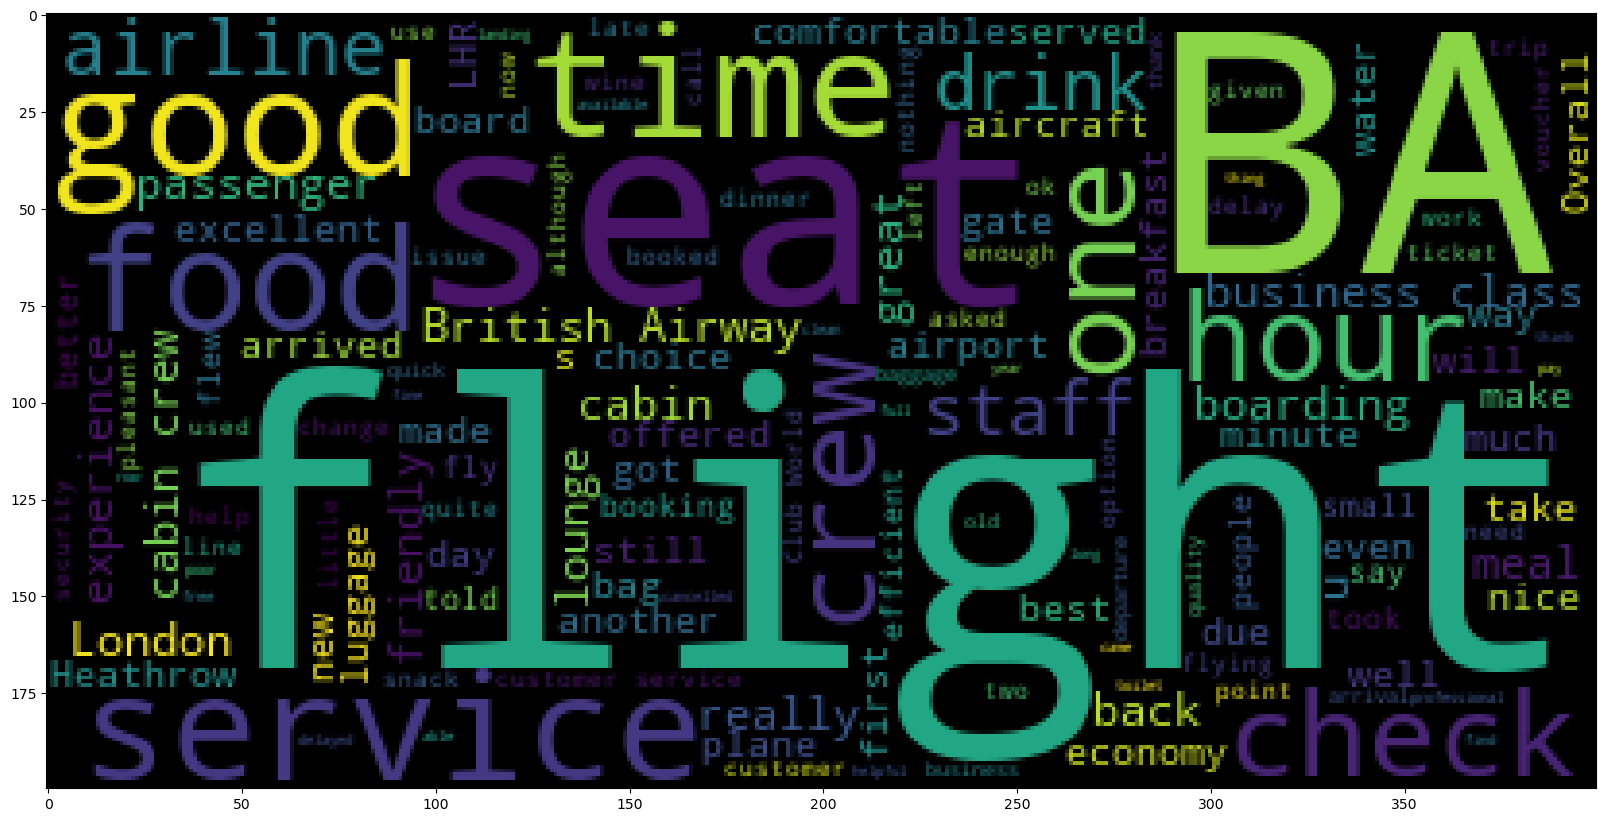

In [117]:
#positive reviews
positive_text = ''.join(reviews_df[reviews_df['Sentiment'] == 'positive']['reviews'])

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_text))

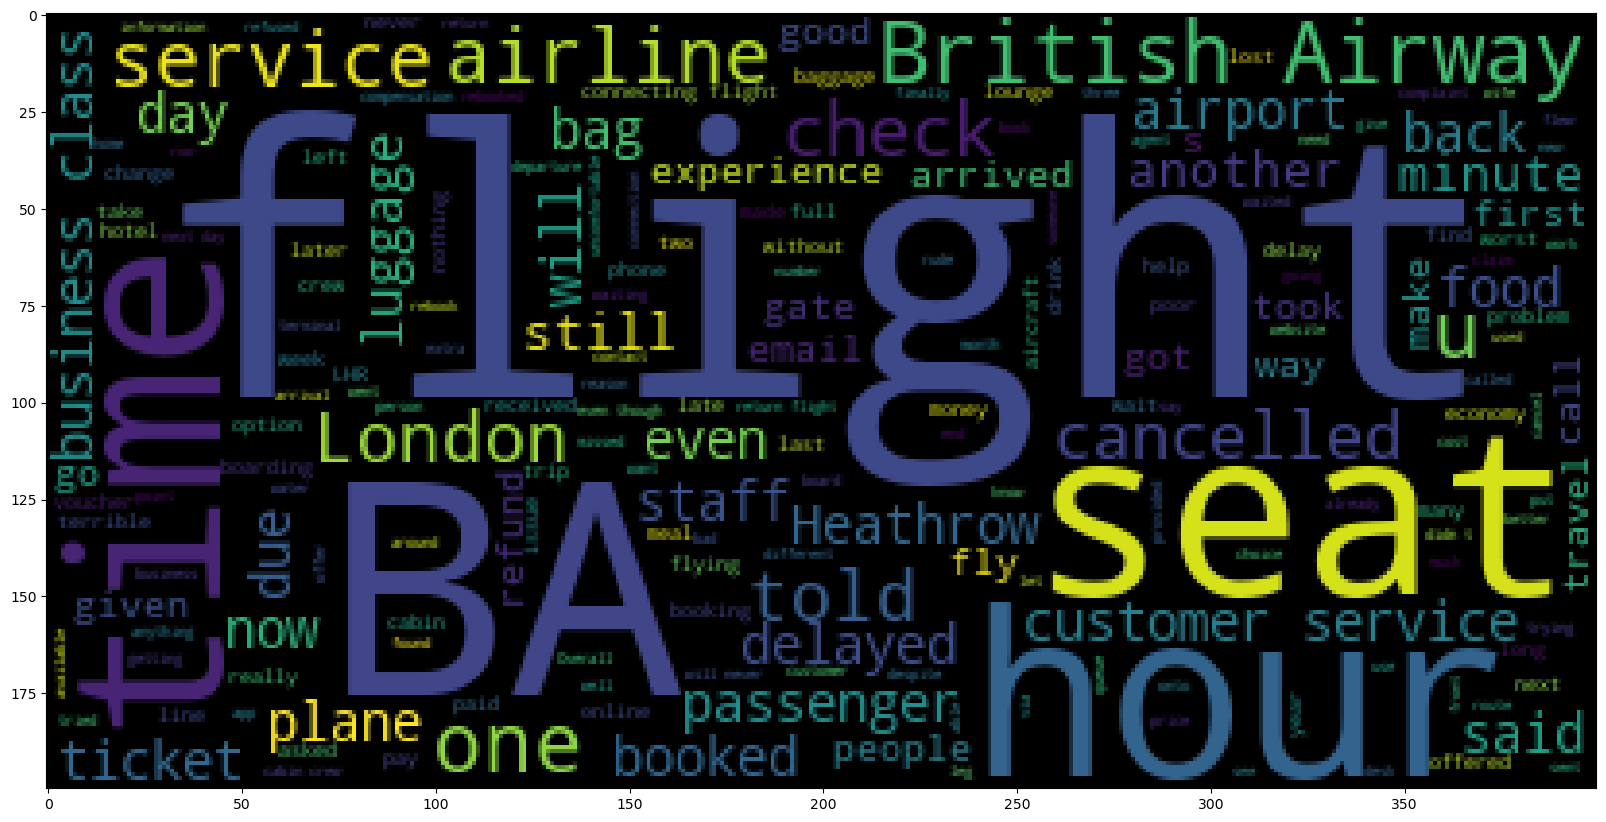

In [115]:
#negative reviews
negative_text = ''.join(reviews_df[reviews_df['Sentiment'] == 'negative']['reviews'])

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_text))

Sentiment
negative    531
positive    469
Name: count, dtype: int64


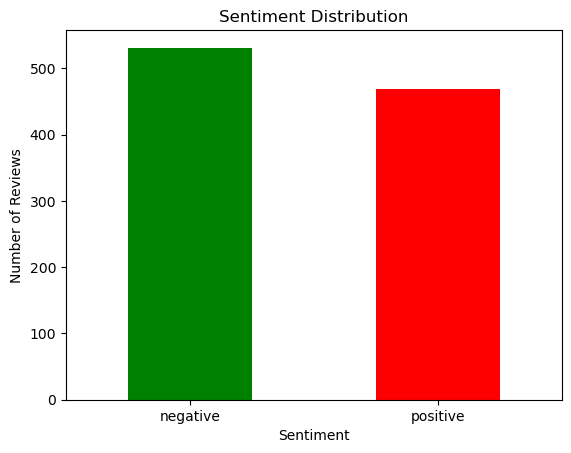

In [130]:
#count positive and negative sentiment

sentiment_counts = reviews_df['Sentiment'].value_counts()
print(sentiment_counts)

sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

In [138]:
# Filter to only positive reviews
positive_reviews = reviews_df[reviews_df['Sentiment'] == 'positive']

# Count occurrences of each unique review
most_common_positive = positive_reviews['reviews'].value_counts().idxmax()

# Show it
print("Most Common Positive Review:")
print(most_common_positive)

#count = positive_reviews['reviews'].value_counts().max()
#print(f"This review appeared {count} times.")


Most Common Positive Review:
   We are extremely grateful to the crew of flight BA0058 from Cape Town to Heathrow. They brought us home with such a high level of professionalism, flexibility, and empathy.  Thank you so much. 
This review appeared 1 times.


In [140]:
# Filter to only positive reviews
negative_reviews = reviews_df[reviews_df['Sentiment'] == 'negative']

# Count occurrences of each unique review
most_common_negative = negative_reviews['reviews'].value_counts().idxmax()

# Show it
print("Most Common Negative Review:")
print(most_common_negative)

#count = positive_reviews['reviews'].value_counts().max()
#print(f"This review appeared {count} times.")


Most Common Negative Review:
   I had an appalling experience with British Airways. It started when I tried to check in online but couldn’t change my seat due to repeated website errors. I arrived at the airport 4 hours early to sort it out, but the staff at the check-in counter refused to help me—brushing me off before I could even say which flight I was on, simply saying all flights were full. Incredibly rude and unprofessional. The BA lounge was overcrowded, uncomfortable, and poorly equipped—wooden utensils only and very limited seating. Shortly before boarding, I was struck with excruciating abdominal pain. Fearing a medical emergency, I asked to be offloaded. Staff at the boarding gate took my boarding pass and luggage tag, asked me to wait, and then left me sitting there in agony for 40 minutes. I eventually asked to leave to go to hospital—staff said it was fine. However, in my distress, I didn’t realise that they had taken my boarding pass with the baggage reference on it. I a